<a href="https://colab.research.google.com/github/pentakll4002/simpleLinear/blob/main/Simple_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('height-weight.csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


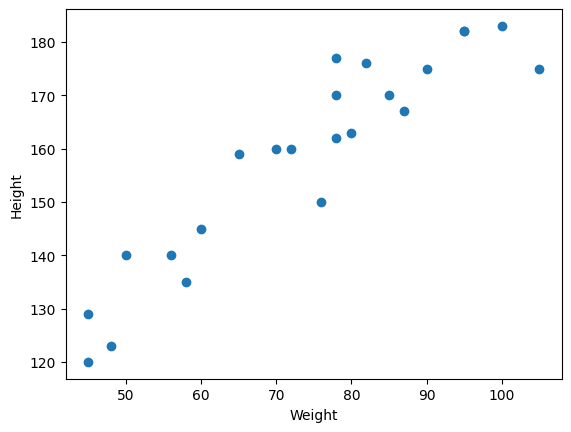

In [ ]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# Devide our dataset into independent and dependent features


In [ ]:
X = df[['Weight']] ### Independent feature
y = df[['Height']] ### Dependent feature

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

# Standardize the dataset

In [ ]:
### Standardize the dataset Train independent data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

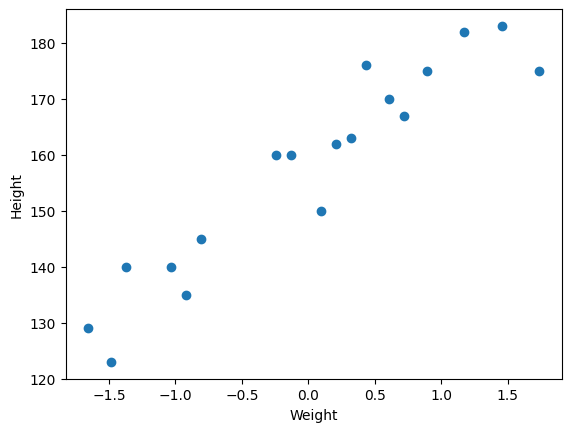

In [ ]:
plt.scatter(X_train, y_train)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# Train Simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The slope or coefficient of weight is: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

The slope or coefficient of weight is:  [[17.03440872]]
Intercept:  [157.5]


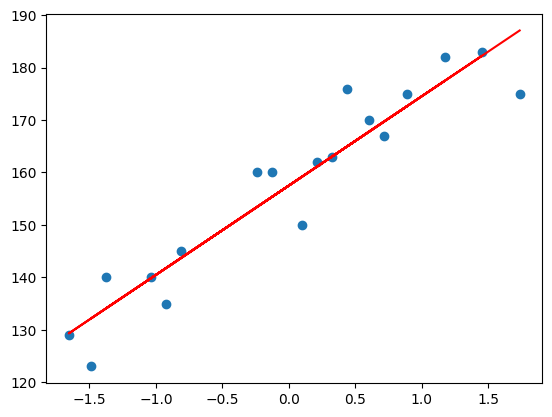

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

prediction of train data
1. predicted height output = intercept + coef_(Weights)

2. y_pred_train = 157.5 + 17.03(X_train)

prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)


In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
y_pred_test, y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

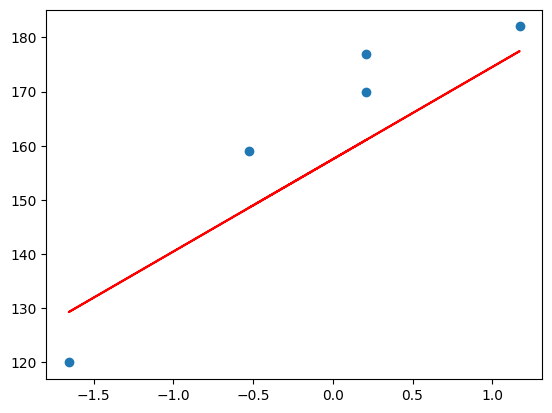

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

# Performance Metrics
#### 1. MSE, MAE, RMSE
#### 2. R-Square, R-Adjust-Squared

In [ ]:
### MSE, MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  9.822657814519232
MSE:  109.77592599051664
RMSE:  10.477400726827081


# R square

# Formula

### R² = 1 - SSR/SST
#### R² = coefficient of determination
#### SSR = sum of squares of residuals
#### SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print('R2: ', score)

R2:  0.776986986042344


## Adjusted R² = 1 - [(1 - R²)(n - 1)] / (n - k - 1)

##where:
####R²: The R² of the model
####n: The number of observations
####k: The number of predictor variables

In [ ]:
r2_adjust = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("R2 Adjust Squared: ", r2_adjust)

R2 Adjust Squared:  0.7026493147231252


In [ ]:
regressor

LinearRegression()

In [ ]:
## New data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
scaled_weight[0]

array([0.32350772])

In [ ]:
print("The height prediction for weight 80 kg is: ", regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is:  [[163.01076266]]


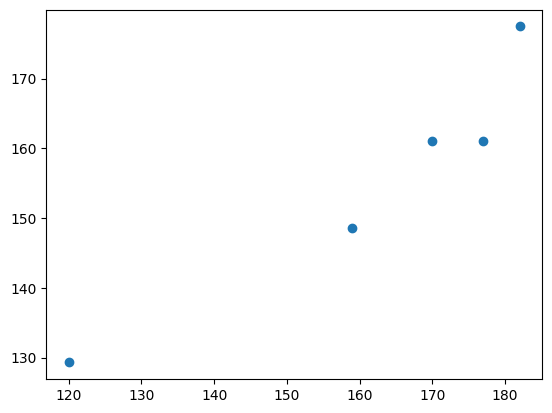

In [ ]:
## Assumption
## Plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)
plt.show()

In [ ]:
## Residuals
residuals = y_test - y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<ipython-input-82-eae358524dd6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: ylabel='Density'>

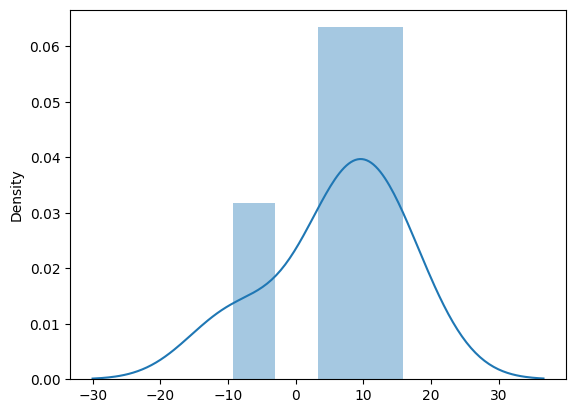

In [ ]:
### Plot this residuals
import seaborn as sns
sns.distplot(residuals, kde=True)

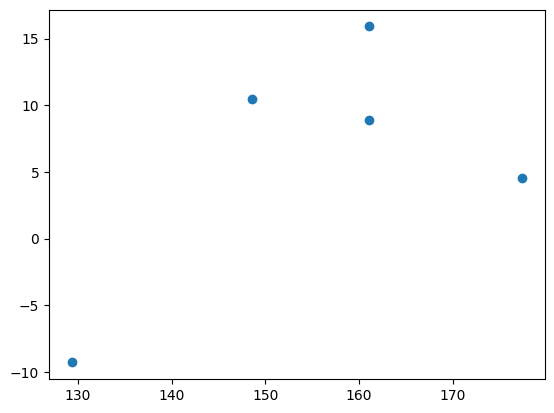

In [ ]:
## Scatter plot with respect to predictions and residuals
## Uniform distribution
plt.scatter(y_pred_test, residuals)

In [ ]:
## Picking the model